# Importing The Libraries

In [1]:
import numpy as np
import pandas as pd
import re #regular expression(pattern matching,searching data)
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
!pip install wordcloud

     -------------------------------------- 300.6/300.6 kB 4.7 MB/s eta 0:00:00


In [3]:
from wordcloud import WordCloud

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pmdan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
twitter_data = pd.read_csv("test_data.csv")

In [6]:
#printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Data Processing

In [7]:
# # loading the data from csv filr to pandas dataframe
# twitter_data = pd.read_csv('/content/training.1600000.processed.noemoticon.csv',encoding = 'ISO-8859-1')

In [8]:
#checking the number of rows and columns
twitter_data.shape

(40001, 6)

In [9]:
#printing the first 5 rows of dataset
twitter_data.head()

Label      number                          date  no_query             name  \
0      0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  _TheSpecialOne_   
1      0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY    scotthamilton   
2      0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY         mattycus   
3      0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          ElleCTF   
4      0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           Karoli   

                                               Tweet  
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1  is upset that he can't update his Facebook by ...  
2  @Kenichan I dived many times for the ball. Man...  
3    my whole body feels itchy and like its on fire   
4  @nationwideclass no, it's not behaving at all....

In [10]:
#naming the columns and reading the dataset again

column_name = ['lable','id','date','flag','user','tweet']
twitter_data = pd.read_csv('test_data.csv',names=column_name,encoding = 'ISO-8859-1')


In [11]:
twitter_data.head()

lable          id                          date      flag  \
0  ï»¿Label      number                          date  no_query   
1         0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
2         0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
3         0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
4         0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                              tweet  
0             name                                              Tweet  
1  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
2    scotthamilton  is upset that he can't update his Facebook by ...  
3         mattycus  @Kenichan I dived many times for the ball. Man...  
4          ElleCTF    my whole body feels itchy and like its on fire

In [12]:
twitter_data.drop(index  = 0, inplace = True)

****counting the number of missing values in the dataset****

In [13]:
twitter_data.isnull().sum()

lable    0
id       0
date     0
flag     0
user     0
tweet    0
dtype: int64

<AxesSubplot:xlabel='lable', ylabel='count'>

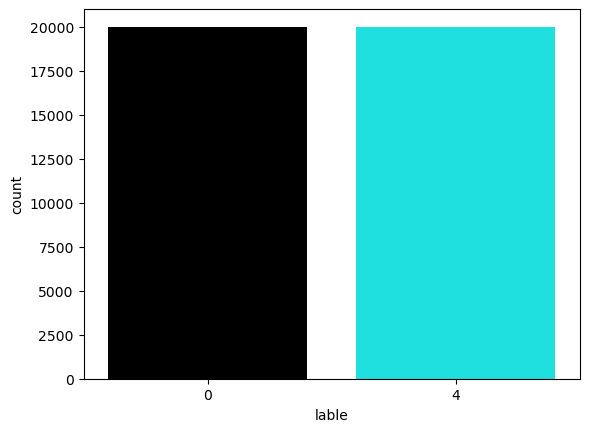

In [14]:
# checking the distribution of target column
sns.countplot(data = twitter_data, x = "lable", palette = ("black","cyan"))

In [15]:
# convert the target '4' to '1'

twitter_data.replace({'lable':{4:1}},inplace=True)
#twitter_data['lable']=twitter_data['lable'].replace(4,1)

In [16]:
twitter_data['lable'].value_counts()

4    20001
0    20000
Name: lable, dtype: int64

In [17]:
import plotly.express as px
# Assuming twitter_data is your DataFrame and the sentiment labels are in a column named 'label'
sentiment = {0: "Negative", 4: "Positive"}

# Convert the 'label' column to integer if it's stored as a string
twitter_data['lable'] = twitter_data['lable'].astype(int)

# Map sentiment labels
twitter_data['sentiment'] = twitter_data['lable'].map(sentiment)

# Create a bar plot using Plotly Express
fig = px.bar(twitter_data['sentiment'].value_counts().reset_index(), x='index', y='sentiment', labels={'index': 'Sentiment', 'sentiment': 'Count'},
             title='Sentiment Analysis',
             color='index',
             color_discrete_map={0: 'red', 4: 'green'})

# Show the plot
fig.show()

0 --> Negative Tweet
1 --> Positive Tweet

## Stemming

### stemming is the process of reducing a word to its Root Word

example: actor,actress,acting =act

In [18]:
 port_stem = PorterStemmer()

In [19]:
def stemming(content):

  stemmed_content = re.sub('[^a-zA-Z]',' ',content)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)

  return stemmed_content

In [20]:
twitter_data['steemed_content'] = twitter_data['tweet'].apply(stemming)

In [21]:
twitter_data.head()

lable          id                          date      flag             user  \
1      0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  _TheSpecialOne_   
2      0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY    scotthamilton   
3      0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY         mattycus   
4      0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          ElleCTF   
5      0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           Karoli   

                                               tweet sentiment  \
1  @switchfoot http://twitpic.com/2y1zl - Awww, t...  Negative   
2  is upset that he can't update his Facebook by ...  Negative   
3  @Kenichan I dived many times for the ball. Man...  Negative   
4    my whole body feels itchy and like its on fire   Negative   
5  @nationwideclass no, it's not behaving at all....  Negative   

                                     steemed_content  
1  switchfoot http twitpic com zl awww bummer sho...  
2  upset updat facebook text might cri result sch...  
3  kenichan dive mani time ball manag save rest g...  
4                    whole bodi feel itchi like fire  
5                      nationwideclass behav mad see

In [22]:
print(twitter_data['steemed_content'])

1        switchfoot http twitpic com zl awww bummer sho...
2        upset updat facebook text might cri result sch...
3        kenichan dive mani time ball manag save rest g...
4                          whole bodi feel itchi like fire
5                            nationwideclass behav mad see
                               ...                        
39997                              grandma make dinenr mum
39998             mid morn snack time bowl chees noodl yum
39999         shadela say like termini movi come like word
40000                      destinyhop im great thaank wbuu
40001                           cant wait til date weekend
Name: steemed_content, Length: 40001, dtype: object


# Visualize the frequent words using WordCloud

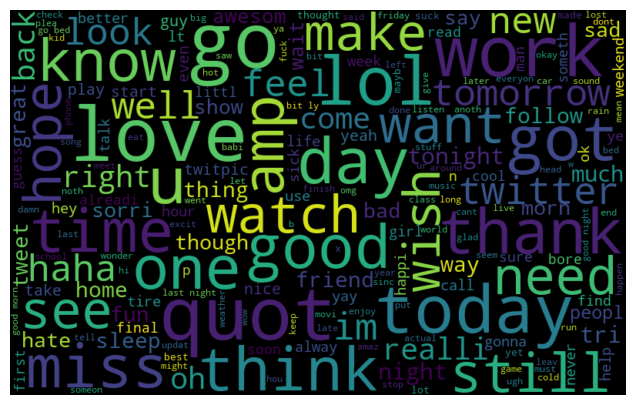

In [23]:
all_words = " ".join([sentence for sentence in twitter_data['steemed_content']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**frequent words visualization for POSITIVE**

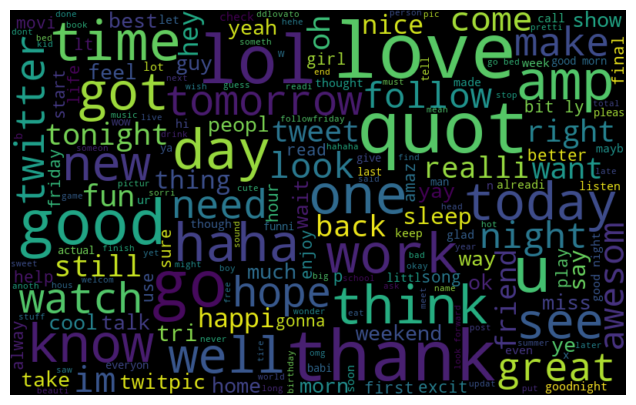

In [24]:
all_words = " ".join([sentence for sentence in twitter_data['steemed_content'][twitter_data['lable']==4]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**frequent words visualization for NEGATIVE**

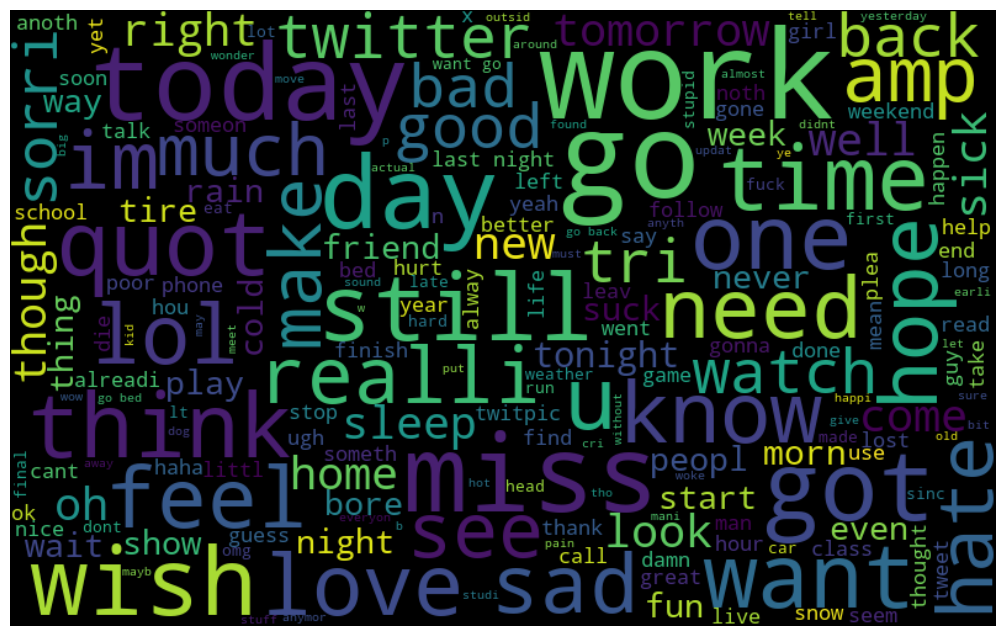

In [27]:
all_words = " ".join([sentence for sentence in twitter_data['steemed_content'][twitter_data['lable']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
print(twitter_data['lable'])

1        0
2        0
3        0
4        0
5        0
        ..
39997    4
39998    4
39999    4
40000    4
40001    4
Name: lable, Length: 40001, dtype: int32


In [29]:
#separating the data and label
X = twitter_data['steemed_content'].values
Y = twitter_data['lable'].values

In [30]:
print(X)

['switchfoot http twitpic com zl awww bummer shoulda got david carr third day'
 'upset updat facebook text might cri result school today also blah'
 'kenichan dive mani time ball manag save rest go bound' ...
 'shadela say like termini movi come like word'
 'destinyhop im great thaank wbuu' 'cant wait til date weekend']


In [31]:
print(Y)

[0 0 0 ... 4 4 4]


#Splitting the data to training data and test data**

In [32]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [33]:
print(X.shape,X_train.shape,X_test.shape)

(40001,) (32000,) (8001,)


In [34]:
print(X_train)

['amykinnear thank mom give pain pill make pain go away though'
 'jrontal nooooo depress' 'absolut chat around want talk brainstorm' ...
 'gingerle love snow canadian april nice outsid snow'
 'stevenabor forev sickest kid defin favorit band'
 'iamdiddi great thought saw bit movi name quot secret quot secret positiv thought']


In [35]:
print(X_test)

['sarahlsharp oop feel like break heart'
 'dear rabbit kind angri fustrat quot arrrrrruuuuu quot made actual dog shut'
 'joy mud vill tonight' ... 'know havn play week seem find time'
 'savannahstern hey fuck hater rule'
 'gawd rubbish collect robot street itali seen']


In [36]:
Y_test.size

8001

In [37]:
# converting the textual data to numerical data

vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [38]:
print(X_train)

  (0, 29272)	0.22033245172073757
  (0, 1989)	0.24899842467631123
  (0, 11095)	0.14740143408248443
  (0, 17720)	0.19481001752759797
  (0, 22418)	0.3781783454134204
  (0, 21719)	0.5630923990279753
  (0, 10981)	0.24990068439420904
  (0, 19286)	0.27100030968640143
  (0, 28908)	0.17687956943008445
  (0, 1065)	0.45000606301855955
  (1, 7162)	0.4514260353887782
  (1, 20763)	0.5707985935921615
  (1, 14876)	0.6858596796184917
  (2, 3602)	0.5811749225124198
  (2, 28443)	0.3299324554132262
  (2, 31530)	0.25501663866706265
  (2, 1601)	0.35743820483151517
  (2, 4874)	0.40541091804335955
  (2, 137)	0.44297484755762323
  (3, 9214)	0.6608008202577019
  (3, 12113)	0.6041093976248333
  (3, 31594)	0.44541453910723366
  (4, 8078)	0.2602928043970667
  (4, 10571)	0.2237858239465539
  (4, 3316)	0.30927036010847203
  :	:
  (31996, 28908)	0.2418060921083026
  (31997, 10938)	0.4829919928007718
  (31997, 4299)	0.39834464265374203
  (31997, 1471)	0.3291817508652248
  (31997, 26814)	0.573109542937033
  (31997, 204

In [39]:
print(X_test)

  (0, 21385)	0.5902959266588271
  (0, 16774)	0.2958608716618501
  (0, 12098)	0.496136211374834
  (0, 9552)	0.3291119372205658
  (0, 3652)	0.457767687949946
  (1, 26204)	0.3459537718309099
  (1, 23513)	0.4000142043265713
  (1, 23491)	0.4207685504798658
  (1, 17614)	0.25388625553762134
  (1, 15699)	0.29134332572639254
  (1, 7698)	0.29064147321282213
  (1, 6937)	0.31566883919818806
  (1, 1214)	0.3756565475331299
  (1, 238)	0.262072820275641
  (2, 31196)	0.6169852404353662
  (2, 29678)	0.289746433038905
  (2, 19763)	0.5769434282503967
  (2, 14840)	0.45001388670220416
  (3, 15861)	1.0
  (4, 29208)	0.19133695854500896
  (4, 28812)	0.285218410712661
  (4, 23813)	0.2949080119930315
  (4, 16774)	0.1508063338103485
  (4, 10021)	0.29173021962692014
  (4, 9645)	0.7506697607423275
  :	:
  (7997, 13255)	0.20694424187647875
  (7997, 12668)	0.20839251051224597
  (7997, 12035)	0.43660918300465745
  (7997, 11718)	0.22616329866011076
  (7997, 11160)	0.24215956057887214
  (7997, 10837)	0.1698782885532922


**Training the machine Learning Model**

## Logestic Regression

In [40]:
model = LogisticRegression(max_iter=1000)

In [41]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

Model Evaluation

In [42]:
# accurracy score on the tarining data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train,X_train_prediction)

In [43]:
print('Accuracy score on the training data:', training_data_accuracy)

Accuracy score on the training data: 0.8519375


**accurracy score on the test data**

In [44]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test,X_test_prediction)

In [45]:
print('Accuracy score on the training data:', training_data_accuracy)

Accuracy score on the training data: 0.8519375


In [46]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score

In [47]:
confusion_matrix(Y_test,X_test_prediction)

array([[3008,  994],
       [ 900, 3099]], dtype=int64)

Model Accuracy = 85.3%

## Multinomial Navie Bayes

In [48]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [49]:
nb_classifier = MultinomialNB()

In [50]:
nb_classifier.fit(X_train, Y_train)

MultinomialNB()

In [51]:
y_pred = nb_classifier.predict(X_test)

In [52]:
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.76


In [53]:
print("Classification Report:")
print(classification_report(Y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.82      0.77      4002
           4       0.79      0.71      0.75      3999

    accuracy                           0.76      8001
   macro avg       0.76      0.76      0.76      8001
weighted avg       0.76      0.76      0.76      8001



## Bernoulli Naive Bayes

In [54]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

In [55]:
bnb_classifier = BernoulliNB()

In [56]:
bnb_classifier.fit(X_train, Y_train)

BernoulliNB()

In [57]:
y_pred = bnb_classifier.predict(X_test)

In [58]:
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.76


In [59]:
print("Classification Report:")
print(classification_report(Y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.82      0.78      4002
           4       0.80      0.71      0.75      3999

    accuracy                           0.76      8001
   macro avg       0.77      0.76      0.76      8001
weighted avg       0.77      0.76      0.76      8001



## SGDClassifier

In [60]:
from sklearn.linear_model import SGDClassifier

In [61]:
# Initialize SGD classifier
sgd = SGDClassifier(loss="log", random_state=42)

# Train the model on training data
sgd.fit(X_train, Y_train)


SGDClassifier(loss='log', random_state=42)

In [62]:
# Evaluate model performance on test data
accuracy = sgd.score(X_test, Y_test)
print(f"Accuracy on test set: {accuracy:.4f}")

# # Predict sentiment for new tweets
# new_tweet = "I'm loving this new movie!"
# new_features = vectorizer.transform([new_tweet])
# predicted_sentiment = sgd.predict(new_features)
# print(f"Predicted sentiment for new tweet: {predicted_sentiment[0]}")


Accuracy on test set: 0.7564


In [63]:
# Use your trained model (sgd in this case) to predict labels on the test data
y_pred = sgd.predict(X_test)


In [64]:
# Calculate the confusion matrix using 'confusion_matrix' function
cm = confusion_matrix(Y_test, y_pred)

# Print the confusion matrix
print(cm)


[[2958 1044]
 [ 905 3094]]


In [65]:
accuracy

0.7564054493188351

## Support Vector Machine

In [66]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [67]:
# Train the SVM model
svm = SVC(kernel="linear")  # Experiment with different kernels
svm.fit(X_train, Y_train)

SVC(kernel='linear')

In [68]:
# Make predictions on the testing set
y_pred = svm.predict(X_test)

In [69]:
# Evaluate model performance
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7649043869516311


In [70]:
print("Classification Report:")
print(classification_report(Y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.76      4002
           4       0.76      0.77      0.77      3999

    accuracy                           0.76      8001
   macro avg       0.76      0.76      0.76      8001
weighted avg       0.76      0.76      0.76      8001



In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
y_true = Y_test  # True labels
y_pred = svm.predict(X_test)  # Predicted labels

cm = confusion_matrix(y_true, y_pred)
print(cm)

[[3049  953]
 [ 928 3071]]


## Hybrid model

In [73]:
meta_features1 = nb_classifier.predict_proba(X_train)
meta_features2 = bnb_classifier.predict_proba(X_train)

In [74]:
import numpy as np
combined_features = np.concatenate((meta_features1, meta_features2), axis=1)

In [75]:
from sklearn.ensemble import RandomForestClassifier
meta_classifier = RandomForestClassifier()
meta_classifier.fit(combined_features, Y_train)

RandomForestClassifier()

In [76]:
test_meta_features1 = nb_classifier.predict_proba(X_test)
test_meta_features2 = bnb_classifier.predict_proba(X_test)
test_combined_features = np.concatenate((test_meta_features1, test_meta_features2), axis=1)

In [77]:
Y_pred = meta_classifier.predict(test_combined_features)
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Accuracy: 0.7515310586176728
              precision    recall  f1-score   support

           0       0.74      0.77      0.76      4002
           4       0.76      0.74      0.75      3999

    accuracy                           0.75      8001
   macro avg       0.75      0.75      0.75      8001
weighted avg       0.75      0.75      0.75      8001



Confusion Matrix (without normalization):
[[3071  931]
 [1057 2942]]

Confusion Matrix (with normalization):
[[0.76736632 0.23263368]
 [0.26431608 0.73568392]]


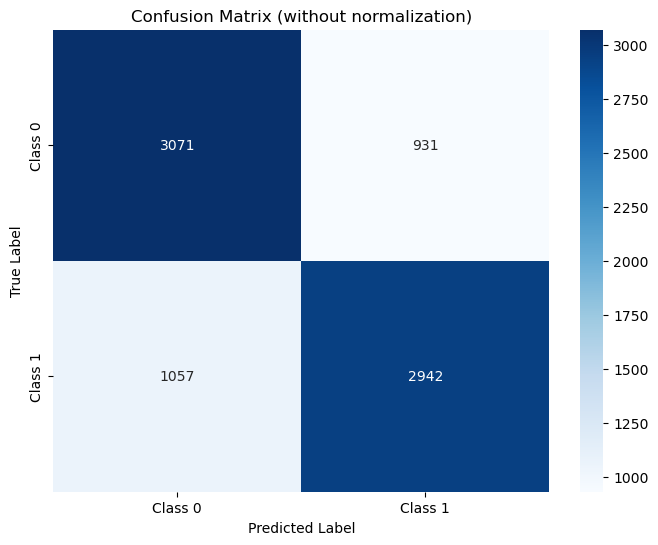

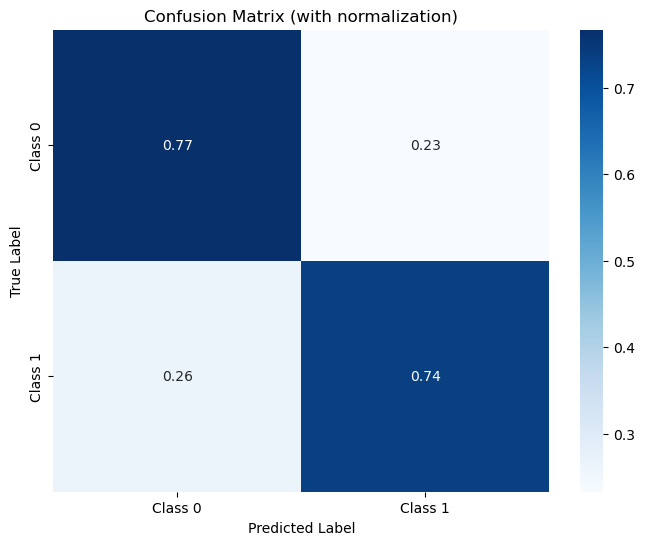

In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# ... Your existing code ...

# Calculate and print the confusion matrix without normalization
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix (without normalization):")
print(conf_matrix)

# Calculate and print the confusion matrix with normalization
conf_matrix_normalized = confusion_matrix(Y_test, Y_pred, normalize='true')
print("\nConfusion Matrix (with normalization):")
print(conf_matrix_normalized)

# Visualize the confusion matrix without normalization using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix (without normalization)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Visualize the confusion matrix with normalization using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix (with normalization)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [78]:
models = ["Logistic Regression","Multinomial Naive Bayes","Bernoulli Naive Bayes","SGD Classifier","SVM","Hybrid Model"]
accuracies = [0.853,0.75,0.76,0.75,0.76,0.75]


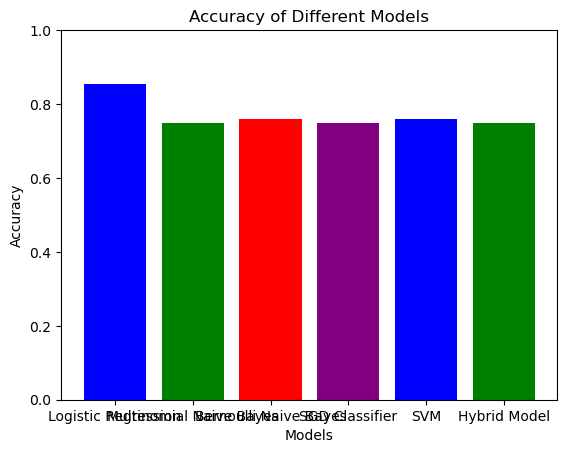

In [79]:
import matplotlib.pyplot as plt
models = ["Logistic Regression","Multinomial Naive Bayes","Bernoulli Naive Bayes","SGD Classifier","SVM","Hybrid Model"]
accuracies = [0.853,0.75,0.76,0.75,0.76,0.75]


plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)  # Set y-axis limits to better visualize differences
plt.show()


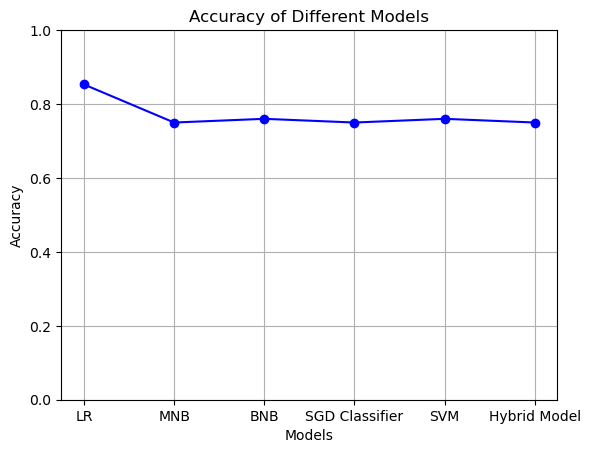

In [86]:
import matplotlib.pyplot as plt

models = ["LR","MNB","BNB","SGD Classifier","SVM","Hybrid Model"]
accuracies = [0.853,0.75,0.76,0.75,0.76,0.75]

plt.plot(models, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)  # Set y-axis limits to better visualize differences
plt.grid(True)
plt.show()
